In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
sys.path.append('../')
from CAFdata import *
import helpers
from datetime import date

%load_ext autoreload
%autoreload 2

: 

In [2]:
day = date.today().strftime("%Y_%m_%d")
NuEScat_dir = f'/sbnd/data/users/brindenc/analyze_sbnd/nue/states/2022A/2023_1_26'
fnames = ['cut_events_basic.root','cut_events_trk.root','cut_events_shw.root']

In [3]:
dfs = []
for fname in fnames:
  tree = uproot.open(f'{NuEScat_dir}/{fname}:rectree;1')
  df = helpers.get_df(tree,tree.keys(),hdrkeys=['run','subrun','evt'])
  dfs.append(df)
events = pd.concat(dfs,axis=1)

In [4]:
#events_tree = uproot.open(f'{DATA_DIR}/{FNAME}:rectree;1')
#events = helpers.get_df(events_tree,events_tree.keys(),hdrkeys=['run','subrun','evt'])
#events = events_tree.arrays(library='pd')
#events[1]

In [5]:
#events.set_index(['run','subrun','evt'])

In [6]:
def set_event_type(events):
  events.loc[events.loc[:,'evt_type'] == 0,'evt_type'] = 'NuEScat'
  events.loc[events.loc[:,'evt_type'] == 1,'evt_type'] = 'NCPi0'
  events.loc[events.loc[:,'evt_type'] == 2,'evt_type'] = 'NC'
  events.loc[events.loc[:,'evt_type'] == 3,'evt_type'] ='CCNuMu'
  events.loc[events.loc[:,'evt_type'] == 4,'evt_type'] = 'CCNuE'
  events.loc[events.loc[:,'evt_type'] == 5,'evt_type'] = 'Dirt'
  events.loc[events.loc[:,'evt_type'] == 6,'evt_type'] ='Other'
  return events

In [7]:
events.keys()

Index(['run', 'subrun', 'evt', 'nshw', 'ntrk', 'truenshw', 'truentrk', 'nstub',
       'nslc', 'nele', 'Etheta', 'evt_type', 'vtx.x', 'vtx.y', 'vtx.z',
       'true_spill_eng', 'reco_eng', 'reco_theta', 'true_theta',
       'genie_inttype', 'genie_mode', 'run', 'subrun', 'evt', 'ltrk.eng',
       'ltrk.len', 'ltrk.npts', 'ltrk.pfptrkscore', 'ltrk.muonscore',
       'ltrk.pionscore', 'ltrk.protonscore', 'ltrk.start.x', 'ltrk.start.y',
       'ltrk.start.z', 'sltrk.eng', 'sltrk.len', 'sltrk.npts',
       'sltrk.pfptrkscore', 'sltrk.muonscore', 'sltrk.pionscore',
       'sltrk.protonscore', 'sltrk.start.x', 'sltrk.start.y', 'sltrk.start.z',
       'run', 'subrun', 'evt', 'lshw.eng', 'lshw.dedx', 'lshw.cnvgap',
       'lshw.dens', 'lshw.len', 'lshw.openangle', 'lshw.electron',
       'lshw.photon', 'lshw.other', 'lshw.start.x', 'lshw.start.y',
       'lshw.start.z', 'slshw.eng', 'slshw.dedx', 'slshw.cnvgap', 'slshw.dens',
       'slshw.len', 'slshw.openangle', 'slshw.electron', 'slshw.phot

In [8]:
events = set_event_type(events)
event_names = events['evt_type'].unique()
colors = cm.get_cmap('Spectral', len(event_names))

In [9]:
event_names

array(['CCNuMu', 'Dirt', 'NC', 'NCPi0', 'CCNuE', 'NuEScat'], dtype=object)

In [10]:


lshw_keys = [key for key in events.keys() if key[:5] == 'lshw.']
lshw_keys.extend(['evt_type'])
slshw_keys = [key for key in events.keys() if key[:6] == 'slshw.']
slshw_keys.extend(['evt_type'])

lshw = events.loc[:,lshw_keys]
slshw = events.loc[:,slshw_keys]

lshw = lshw[(lshw != -9999).all(1)] #Remove all -999 dummy values
lshw = lshw[(lshw != -999).all(1)] #Remove all -999 dummy values
lshw = lshw[(lshw != -5).all(1)] #Remove all -5 dummy values
lshw = lshw.loc[lshw.loc[:,'lshw.dedx']<100] #Remove all huge dedx values

slshw = slshw[(slshw != -9999).all(1)] #Remove all -999 dummy values
slshw = slshw[(slshw != -999).all(1)] #Remove all -999 dummy values
slshw = slshw[(slshw != -5).all(1)] #Remove all -5 dummy values
slshw = slshw.loc[slshw.loc[:,'slshw.dedx']<100] #Remove all huge dedx values

In [11]:
ltrk_keys = [key for key in events.keys() if key[:5] == 'ltrk.']
ltrk_keys.extend(['evt_type'])
sltrk_keys = [key for key in events.keys() if key[:6] == 'sltrk.']
sltrk_keys.extend(['evt_type'])

ltrk = events.loc[:,ltrk_keys]
sltrk = events.loc[:,sltrk_keys]

ltrk = ltrk[(ltrk != -9999).all(1)] #Remove all -999 dummy values
ltrk = ltrk[(ltrk != -999).all(1)] #Remove all -999 dummy values
ltrk = ltrk[(ltrk != -5).all(1)] #Remove all -5 dummy values
#ltrk = ltrk.loc[ltrk.loc[:,'ltrk.dedx']<100] #Remove all huge dedx values

sltrk = sltrk[(sltrk != -9999).all(1)] #Remove all -999 dummy values
sltrk = sltrk[(sltrk != -999).all(1)] #Remove all -999 dummy values
sltrk = sltrk[(sltrk != -5).all(1)] #Remove all -5 dummy values
#sltrk = sltrk.loc[sltrk.loc[:,'sltrk.dedx']<100] #Remove all huge dedx values

In [12]:
def plot_all_keys(df):
  for key_x in df.keys():
    for key_y in df.keys():
      fig,ax = plt.subplots(figsize=(6,6),tight_layout=True)
      helpers.set_style(ax)
      for name in event_names:
        x = df.loc[df['evt_type']==name,key_x]
        y = df.loc[df['evt_type']==name,key_y]
        if key_x == key_y and key_x!='evt_type' and key_y!= 'evt_type':
          sns.kdeplot(x=x,ax=ax,label=f'{name} ({len(x)})')
        else:
          sns.scatterplot(x=x,y=y,label=f'{name} ({len(x)})',ax=ax,alpha=0.5)
      ax.legend()
      helpers.save_plot(f'{key_x}_{key_y}',folder_name=f'{NuEScat_dir}/plots',fig=fig)
      plt.close(fig)

      
      

In [13]:
plot_all_keys(lshw)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
/sbnd/data/users/brindenc/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/sbnd/data/users/brindenc/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/sbnd/data/users/brindenc/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `

: 

: 

In [35]:
lshw.loc[lshw['evt_type']=='NuEScat','lshw.dedx']

entry  subentry
0      262         1.934465
       488         1.870569
Name: lshw.dedx, dtype: float64

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

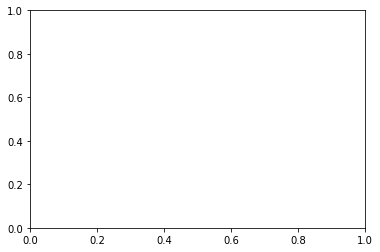

In [45]:
xs = []
for name in event_names:
  xs.append(lshw.loc[lshw['evt_type']==name,'lshw.dedx'])
sns.kdeplot(xs)

<AxesSubplot:xlabel='lshw.dedx', ylabel='Density'>

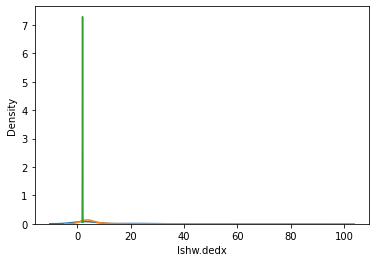

In [34]:
sns.kdeplot(lshw.loc[lshw['evt_type']=='CCNuE','lshw.dedx'])
sns.kdeplot(lshw.loc[lshw['evt_type']=='CCNuMu','lshw.dedx'])
sns.kdeplot(lshw.loc[lshw['evt_type']=='NuEScat','lshw.dedx'])



In [ ]:


# Loop through the axes and save each plot individually
for i, ax in enumerate(axes):
  fname = f'{ax.get_xlabel()}_{ax.get_ylabel()}'
  helpers.save_plot(fname,fig=ax.figure,folder_name=f'{NuEScat_dir}/plots')
    

KeyboardInterrupt: 

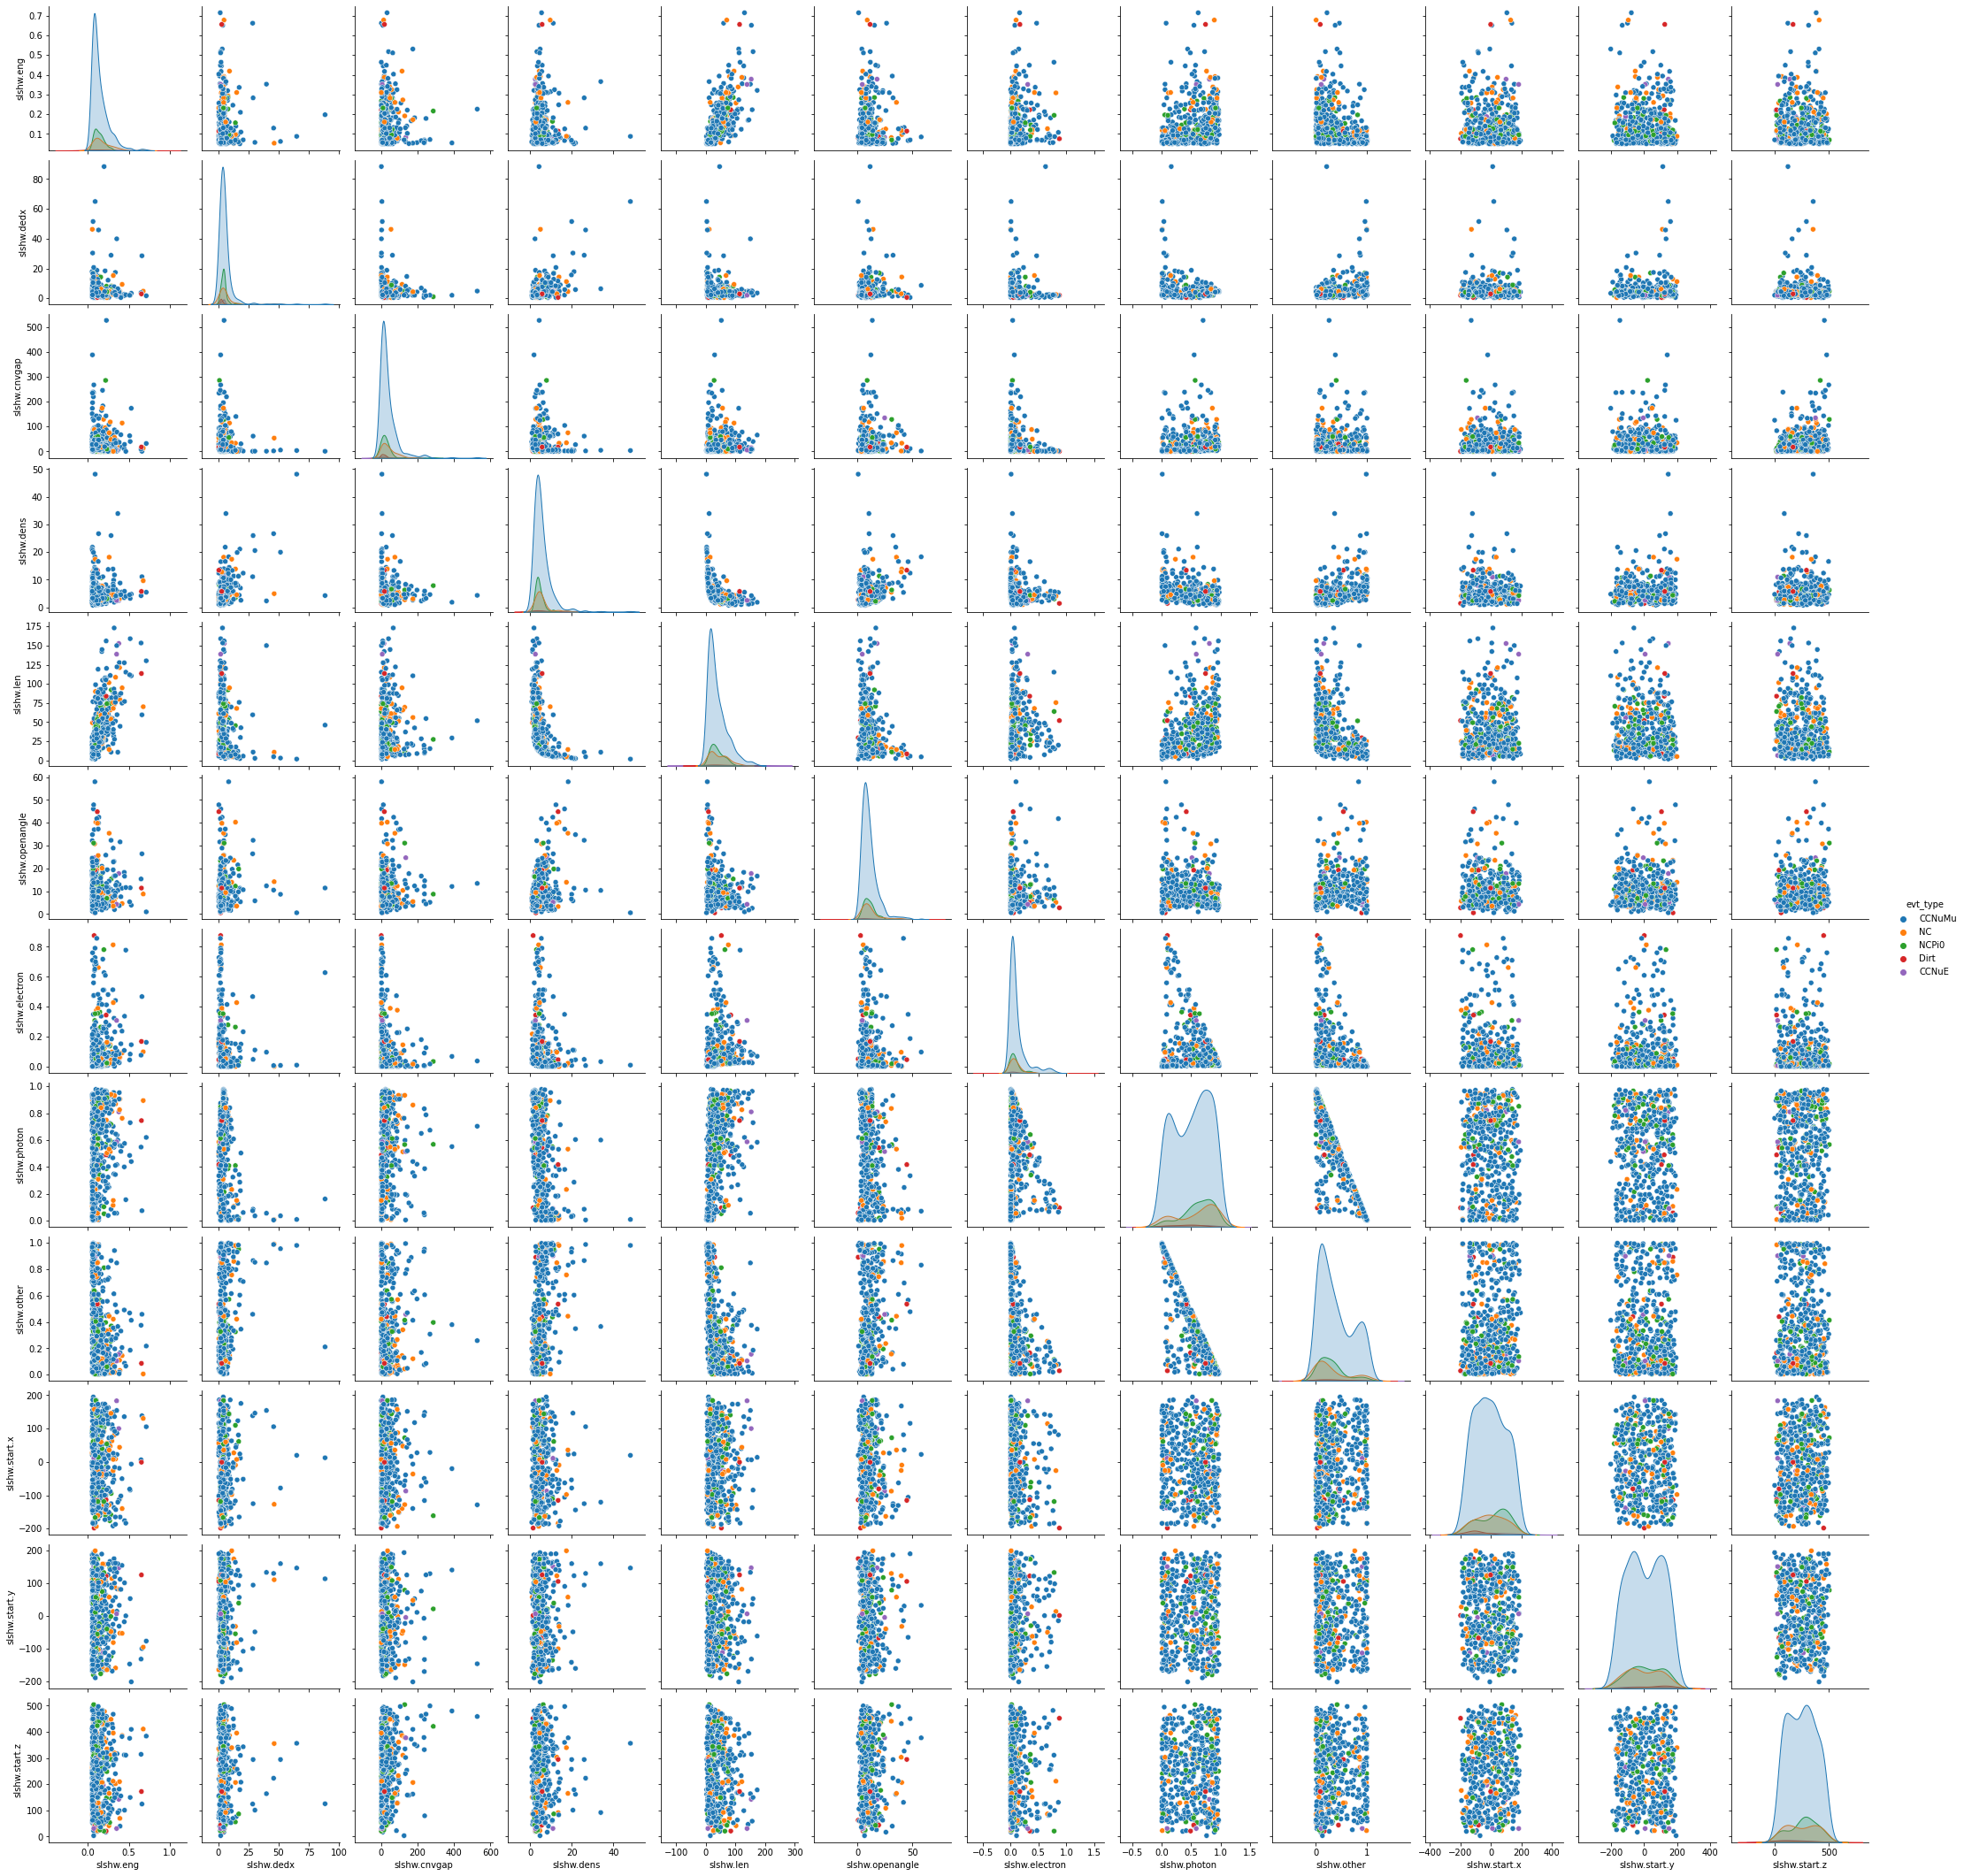

In [36]:
lm = sns.pairplot(slshw,hue='evt_type')

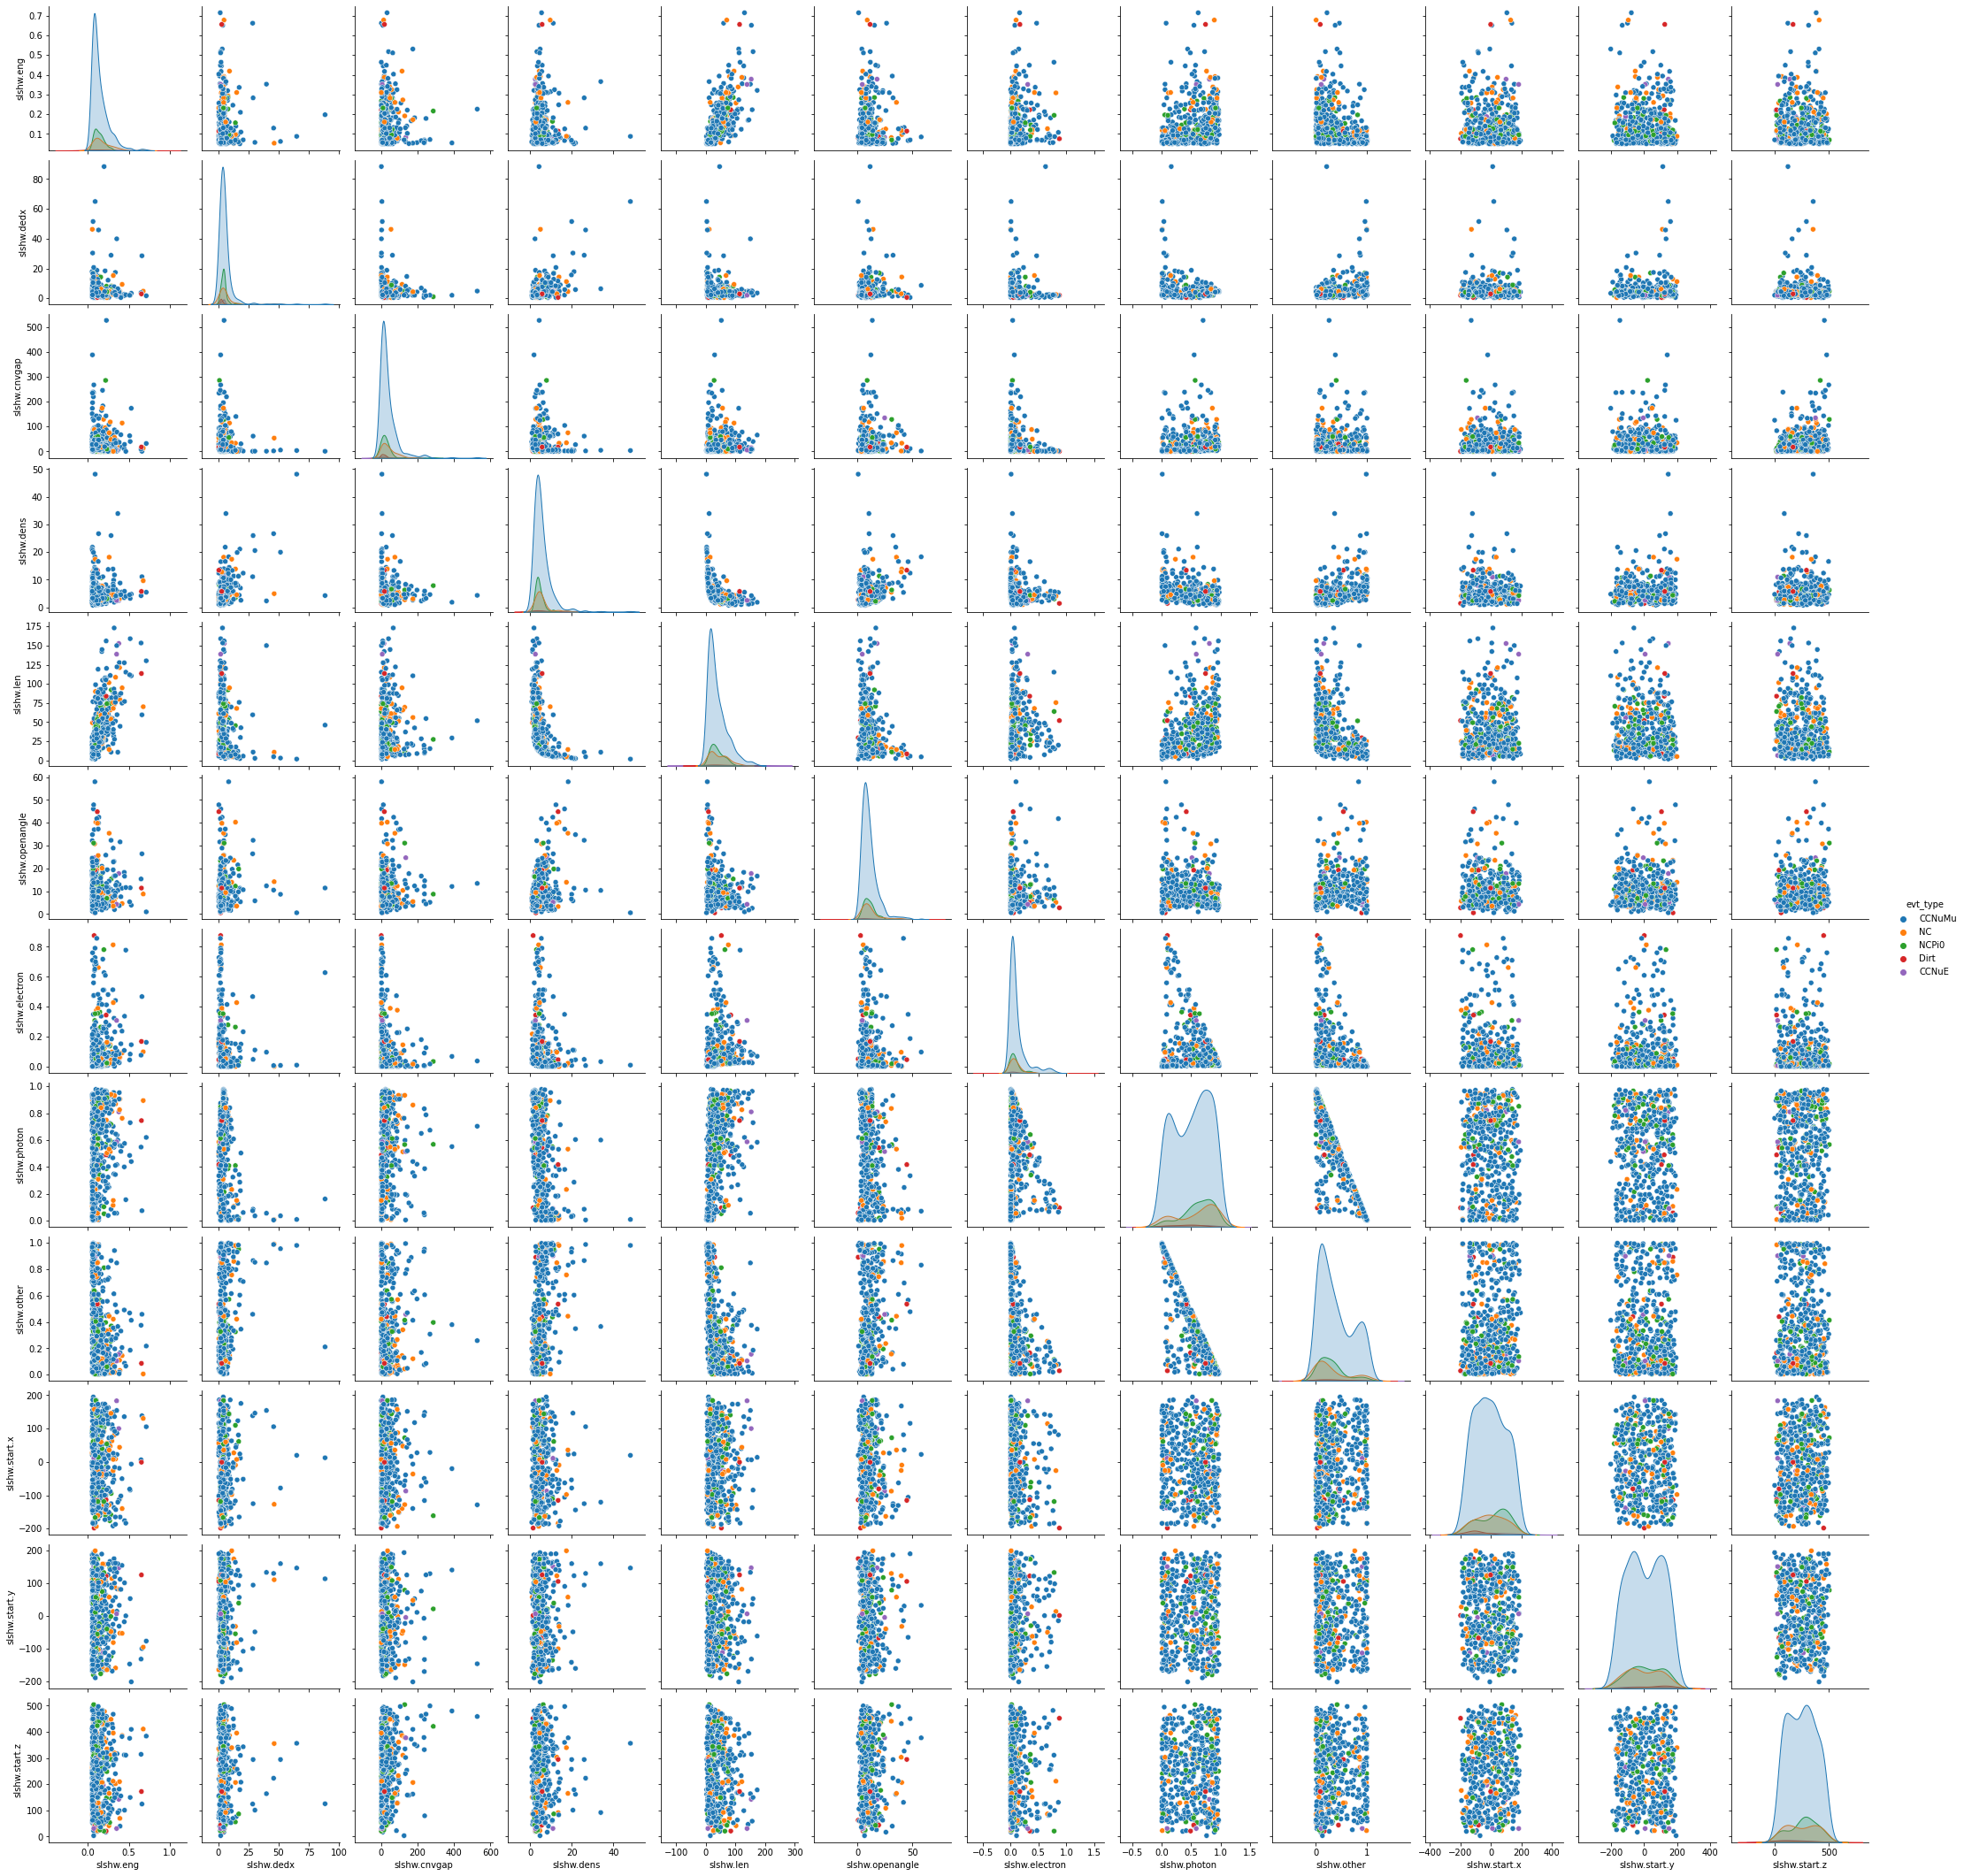

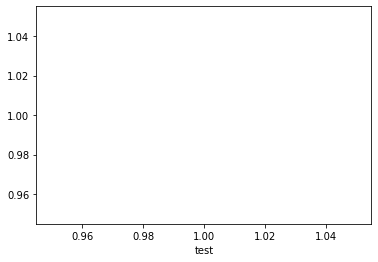

In [38]:
plt.plot(1,1)
plt.xlabel('test')

# Get the current figure and axes
fig = plt.gcf()
axes = fig.get_axes()

# Loop through the axes and save each plot individually
for i, ax in enumerate(axes):
  fname = f'{ax.get_xlabel()}_{ax.get_ylabel()}'
  helpers.save_plot(fname,fig=ax.figure,folder_name=f'{NuEScat_dir}/plots')


In [27]:
938.15 +31.55 +27.73 +16.00 +8.22 +17.51

1039.16

In [27]:
import random

def get_random_univ(M,sys):
  """
  \description: get random universe for bin counts N by randomly
  varying within systematic and statistical uncertainties
  \param: M - Montecarlo events
  """
  N = M.copy() #Copy M, make it "data-like"
  for i,bin_content in enumerate(N):
    bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],sys[i])
    #bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],1/np.sqrt(N[i])) #stat
    N[i] = bin_content
  return N

In [4]:
M = np.array([48.7,14.4,20.5,18.1,11.9,21.6])
sys = np.array([9.9,5.2,6.3,5.9,4.3,7.7])
stat = 1/np.sqrt(M)
stat,sys/M

(array([0.14329648, 0.26352314, 0.22086305, 0.23505025, 0.28988552,
        0.21516574]),
 array([0.20328542, 0.36111111, 0.30731707, 0.32596685, 0.36134454,
        0.35648148]))

In [ ]:
#events_tree = uproot.open(f'{DATA_DIR}/{FNAME}')
#events_tree['rectree;1'].keys()

In [5]:
n = get_random_univ(M,sys)
n,M

NameError: name 'get_random_univ' is not defined